# **Introduction to Equation Solving & Optimization in Python**

Python provides powerful tools and libraries for solving various types of equations, ranging from simple systems of linear equations to more complex polynomial and non-linear equations. This introduction will guide you through the basics of solving these equations using Python.

## 1. **Solving Systems of Linear Equations**

A system of linear equations can be represented in matrix form as $Ax = b$, where:
- $A$ is a matrix of coefficients,
- $x$ is a vector of unknowns,
- $b$ is a vector of constants.

In Python, you can solve such systems using the `numpy` library:

In [20]:
import numpy as np

# Coefficient matrix A
A = np.array([[3, 1], [1, 2]])

# Constant vector b
b = np.array([9, 8])

# Solving for x
x = np.linalg.solve(A, b)

print(x)

[2. 3.]


**Exercises:**

1. Write a function `fit` taking in a np.array `y` and a matrix `X` of conformable dimensions, such that it calculates the OLS estimator $\hat{\beta}(X)$, as well as the residual vector $\epsilon$. Do not solve the normal equations with a matrix inverse, but use `np.linalg.solve`.
2. Write a function `robust` which estimates the sandwich estimator: 
   
$$\text{Var}(\hat{\beta})_{\text{robust}} = (X'X)^{-1} \left( \sum_{i=1}^n X_i' \hat{\epsilon}_i^2 X_i \right) (X'X)^{-1}$$

3. Write a `class` called `olsmodel` which holds `y` and `X`, and which contains methods `fit`, `robust` and `predict`

## 2. **Finding Roots of Polynomial Equations**

For polynomial equations, Python’s `numpy` library offers straightforward methods to find roots. For example, to solve a polynomial equation like $ax^2 + bx + c = 0$. 
This code computes the roots of the quadratic equation $x^2 - 3x + 2 = 0$, which are the values of $x$ that satisfy the equation.


In [21]:
coefficients = [1, -3, 2]  # Coefficients of x^2 - 3x + 2
roots = np.roots(coefficients)

print(roots)

[2. 1.]


**Exercise:** Write a function `IRR` to calculate the internal rate of return of a payment stream. The function takes as arguments a stream of future payments $x_1,...,x_n$ and an initial payment $C_0$, and finds the roots of the equation $$ C_0 = \sum_i x_i (1+r)^{-i}.$$
It then checks which of the roots $\{r_1,...,r_n\}$ are real and $>-1$, and returns those. Does the function work well for large $n$?

## 3. **Newton Methods for General Non-Linear Equations**
We now try to understand Newton's workhorse optimization routine.

### Newton's Method

#### 1. **Basic Idea**

Newton's method iteratively approximates the root of a function using the following update rule:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

where:

- $x_n$ is the current estimate of the root.
- $f'(x_n)$ is the derivative (or Jacobian, in the multivariate case) of $f(x)$ at $x_n$.

#### 2. **Algorithm**

1. **Start with an initial guess** $x_0$.
2. **Compute the function value** $f(x_n)$ and its derivative $f'(x_n)$.
3. **Update the estimate** using the formula $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$.
4. **Repeat** until the change in $x$ is smaller than a specified tolerance, or the function value $f(x_n)$ is sufficiently close to zero.

**Exercise:** With pen and paper, prove that Newton's method converges in one step for any linear equation $Ax = b$

In [22]:
from scipy.optimize import fsolve

# Define the equation
def equation(x):
    return x**3 - x - 2

# Initial guess for the root
initial_guess = 1.0

# Solving for the root
root = fsolve(equation, initial_guess)

print(root)

[1.52137971]


Let's write a multivariate Newton solver able to solve equations of type $F(x)=0, \; F: \mathbb{R}^n \rightarrow \mathbb{R}^n$. The solver should take as inputs a funtion to solve, `f`, a vector `x0` as a starting point, and a tolerance level `tol` for convergence, as well as a `maxiter` number of iterations after which it stops the solution process.
We proceed in a few steps, in particular, first we need a method to obtain the jacobian, `Jf` at an arbitrary point:

In [23]:
# example function I
def f(x):
    return np.array([
        x[0]**2 - 2 + 4*x[1], 
        - x[1] + x[0]**5
    ])
x0 = np.array([1., 1.])

# # example function II
# def f(x):
#     return np.array([
#         x[0]**2, 
#         x[1]**5
#     ])
# x0 = np.array([1., 1.])

# # example function III
# def f(x):
#     return np.array([
#         x[0]**2
#     ])
# x0 = np.array([1.])

f(x0)

array([3., 0.])

In [24]:
# run-off-the-mill method to calculate a jacobian numerically
def jacobian(f, x0):

    x0 = np.array(x0, dtype='float64') 

    fx0 = f(x0)
    M, N = *fx0.shape, *x0.shape
    Jf = np.empty((M, N))
    epsilon = 1E-8
 
    for i in range(N):
        x_eps = x0.copy()
        x_eps[i] += epsilon
        Jf[i, :] = (f(x_eps) - fx0) / epsilon

    return Jf

# test the function
jacobian(f, x0)

array([[ 1.99999999,  5.00000008],
       [ 3.99999998, -0.99999999]])

In [25]:
# newton solver
def newton(f, x0, tol = 1E-12, maxiter=1_000):
    
    x_old = x0
    x_new = x_old.copy()

    for i in range(maxiter):
        
        x_old = x_new.copy()
        f_old = f(x_new)
        if np.all( np.abs(f_old) < tol ) :
            print(f"convergence achieved after {i} iterations")
            return x_new, f_old, Jf

        Jf = jacobian(f, x_old)
        #print(f_old)
        x_new = x_old - np.linalg.inv(Jf) @ f_old

    print("convergence not achieved")
    return x_old, f_old, Jf

In [26]:
# it works!
newton(f, x0, maxiter=10_000)

convergence achieved after 124 iterations


(array([0.804978  , 0.33800261]),
 array([-8.11350986e-13,  1.27675648e-13]),
 array([[ 1.60995601,  2.09945251],
        [ 4.        , -1.        ]]))

**Exercise:** Secant Method

The Secant method is a derivative-free variation of Newton's method. Instead of using the exact derivative $ f'(x) $, it approximates the derivative using two recent points:

$$
x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

- **Advantages**: Does not require computing derivatives, which can be advantageous when the derivative is difficult to calculate.
- **Disadvantages**: Typically converges more slowly than Newton's method.

Write a univariate root solver `secant_newton` in the spirit of the `newton` solver we just developed, which uses the secant method. 


## 4. **Application: Optimal Life-Time Consumption**
Let's use the solver we just wrote to solve a class of simple optimal consumption problems. In $T$ periods, an agent can decide to save or consume, given an initial endowment $\omega$ and some income $y_t$, which varies every period.

$$
 U = \sum_{0\leq t \leq T-1} \beta^t \log(c_t), \text{  s.t.  } a_{t+1} = y_t + a_t*(1+r) - c_t,\; a_{-1} = \omega,\; a_{T} \geq 0 
$$

Giving us FOCs:
$$
\begin{equation}
    f_0(\omega, a_0, a_1) = 0, 
\end{equation}
$$

$$
\begin{equation}
    f_t(a_{t-1}, a_t, a_{t+1}) \equiv \beta (1+r) ( y_{t-1} + a_{t-1}(1+r) - a_t ) - ( y_t + a_t(1+r) -a_{t+1}) = 0 ,\; \forall 1 \leq t \leq T-2 
\end{equation}
$$

$$
\begin{equation}
    f_{T-2}(a_{T-2}, a_{T-1}, 0) =0 
\end{equation}
$$

to solve simultaneously by choosing $a_0, ..., a_{T-1}$. We could do this in a recursive way, but lets attack the FOCs directly.

In [27]:
beta = 0.98
r = 1/beta - 1
omega = 5

# y has T elements 
y = np.full(10, 1)

# a_choice has T elements 
a_choice = np.full(10, 0)

def F(beta, r, omega, y, a_choice):

    a = np.zeros((1+len(y))) # accommodate initial and terminal condition
    a[0:-1] = a_choice

    F = np.zeros(len(y))
    F[0] = beta*(1+r)**(-1) * ( 0 + omega * (1+r) - a[0] ) - ( y[0] + a[0]*(1+r) - a[1] )

    for t in range(1, len(F)):
        F[t] = beta*(1+r)**(-1) * ( y[t-1] + a[t-1] * (1+r) - a[t] ) - ( y[t] + a[t]*(1+r) - a[t+1] )

    return F

In [28]:
# try the function
print("F =", f"{F(beta, r, omega, y, a_choice)}")

# Does it jacobe? Yes, it does!
J = jacobian(lambda a_choice : F(beta, r, omega, y, a_choice), a_choice)

assert np.linalg.det(J) != 0 # check that the jacobian is not ill conditioned

F = [ 3.9    -0.0396 -0.0396 -0.0396 -0.0396 -0.0396 -0.0396 -0.0396 -0.0396
 -0.0396]


Let's try whether this works out, and whether our solver can find a sequence of assets $a = (a_0, ..., a_{T-1})$ to solve the first order conditions:

In [29]:
a_choices, F_values, _ = newton(lambda a_choice : F(beta, r, omega, y, a_choice), a_choice, maxiter=10_000)

convergence achieved after 10 iterations


Indeed, we have solved the consumption-savings problem with the output of our Newton-solver. Let's plot these results in a figure.

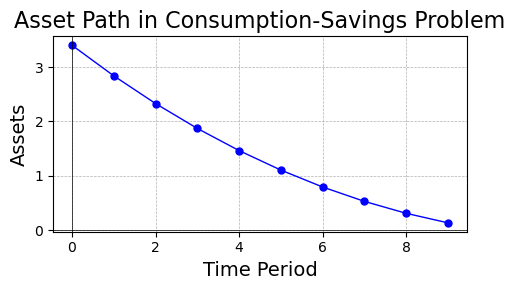

In [30]:
import matplotlib.pyplot as plt

# Plot the asset path
plt.figure(figsize=(5, 3))
plt.plot(a_choices, marker='o', linestyle='-', color='b', markersize=5, linewidth=1)
plt.title('Asset Path in Consumption-Savings Problem', fontsize=16)
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('Assets', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

**Looks great!**

### A Consumption-Savings Class
Now let's go all in and package the problem nicely. We write a class `ConSavProb` which takes as inputs `beta, r, y, omega` and an initial guess for `a`. It has a `solve` method, which solves for the optimal asset and consumption path.


Packaging the consumption-savings problem into a class, in this case `ConSavProb`, offers several benefits:

1. **Modularity**: By encapsulating the problem within a class, we can organize related variables and functions together. This improves code organization and makes it easier to understand and maintain. It also allows us to reuse the class in different parts of our code or even in other projects.

2. **Abstraction**: Instead of exposing all the inner workings of the consumption-savings problem, we can provide a clean interface through class methods. 

3. **Encapsulation**: Classes allow us to encapsulate data and methods together. This means that the variables and functions related to the consumption-savings problem are contained within the class, reducing the chances of naming conflicts with other parts of the codebase. It also provides a clear boundary for the problem, making it easier to reason about and test.

4. **Code Reusability**: Once we have defined the `ConSavProb` class, we can create multiple instances of it with different input parameters.

5. **Readability**: Using a class can improve the readability of the code. 

Overall, using a class to package the consumption-savings problem provides a clean, modular, and reusable solution that enhances code organization, abstraction, and readability.

In [31]:
class ConSavProb:
    """
    A class representing a consumption-savings problem.

    Attributes:
        beta (float): The discount factor.
        r (float): The interest rate.
        y (float): The income.
        omega (float): The initial endowment.
        asset_path (numpy.ndarray): The path of assets over time.
        a_guess (float): The initial guess for assets.
        euler_error (float): The Euler equation error.
        solved (bool): Indicates whether the problem has been solved.

    Methods:
        update_parameters: Update the parameters of the problem.
        solve_asset_path: Solve the consumption-savings problem and compute the asset path.
        plot_asset_path: Plot the asset path.

    """

    def __init__(self, beta, r, y, omega):
        """
        Initialize a ConSavProb object.

        Args:
            beta (float): The discount factor.
            r (float): The interest rate.
            y (float): The income.
            omega (float): The probability of receiving income.

        """
        self.beta = beta
        self.r = r
        self.y = y
        self.omega = omega
        self.asset_path = None
        self.a_guess = None
        self.euler_error = None
        self.solved = False

    def update_parameters(self, beta=None, r=None, y=None, omega=None):
        """
        Update the parameters of the problem.

        Args:
            beta (float, optional): The discount factor.
            r (float, optional): The interest rate.
            y (float, optional): The income.
            omega (float, optional): The probability of receiving income.

        """
        if beta is not None:
            self.beta = beta
        if r is not None:
            self.r = r
        if y is not None:
            self.y = y
        if omega is not None:
            self.omega = omega

    def solve_asset_path(self, a_guess):
        """
        Solve the consumption-savings problem and compute the asset path.

        Args:
            a_guess (float): The initial guess for assets.

        """
        self.a_guess = a_guess  # store the guess for later use
        beta, r, omega, y = self.beta, self.r, self.omega, self.y  # unpack the parameters
        # solve
        self.asset_path, self.euler_error, _ = newton(lambda a: F(beta, r, omega, y, a), a_guess, maxiter=10_000)
        self.solved = True

    def plot_asset_path(self, figsize=(10, 6)):
        """
        Plot the asset path.

        Args:
            figsize (tuple, optional): The figure size. Defaults to (10, 6).

        """
        if self.solved == True:
            # Plot the asset path
            plt.figure(figsize=figsize)
            plt.plot(np.concatenate([self.asset_path, [0.]]), marker='o', linestyle='-', color='b', markersize=5,
                     linewidth=1)
            plt.title('Asset Path in Consumption-Savings Problem')
            plt.xlabel('Time Period')
            plt.ylabel('Assets')
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)
            plt.axhline(0, color='black', linewidth=0.5)
            plt.axvline(0, color='black', linewidth=0.5)
            plt.tight_layout()
            plt.show()

convergence achieved after 10 iterations


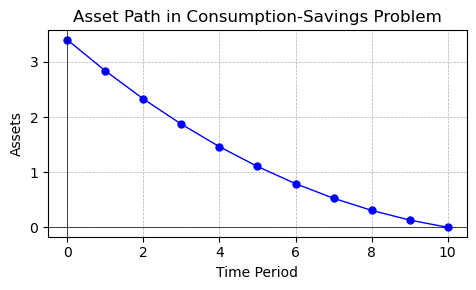

In [32]:
model = ConSavProb(beta, r, y, omega)
model.solve_asset_path(a_guess = np.full(10, 0))

model.plot_asset_path(figsize=(5, 3))


convergence achieved after 42 iterations


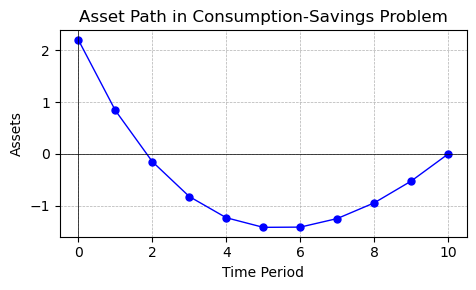

In [33]:
model.update_parameters(beta = 0.85)
model.solve_asset_path(model.a_guess)
model.plot_asset_path(figsize=(5, 3))

What, if income were increasing over time?

convergence achieved after 11 iterations


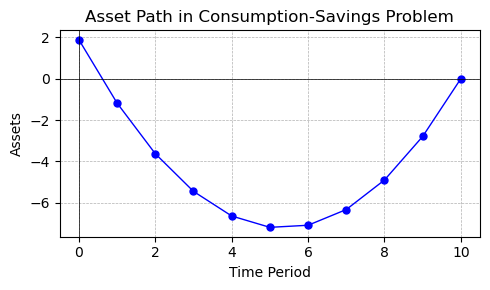

In [34]:
model.update_parameters(y = np.linspace(0,5, 10), beta = 0.98)
model.solve_asset_path(model.a_guess)
model.plot_asset_path(figsize=(5, 3))


## 3. The **`scipy` Library for Solving and Optimization**
For more complex equations, including non-linear systems, Python’s `scipy` library provides powerful tools. 

### 1. Basic Usage of `scipy.optimize`

#### Example: Finding the Minimum of a Function



In [35]:
import numpy as np
from scipy.optimize import minimize

# Define the function to minimize
def f(x):
    return x**2 + 5*np.sin(x)

# Initial guess
x0 = 2.0

# Perform the minimization
result = minimize(f, x0)

print("Minimum value:", result.fun)
print("At x =", result.x)

Minimum value: -3.2463942726915187
At x = [-1.11051058]




### 2. Solving a System of Linear Equations

#### Example: Using `scipy.linalg.solve`



In [36]:
import numpy as np
from scipy.linalg import solve

# Coefficient matrix
A = np.array([[3, 2], [1, 2]])

# Right-hand side vector
b = np.array([2, 0])

# Solve the system
x = solve(A, b)

print("Solution:", x)

Solution: [ 1.  -0.5]




### 3. Integration using `scipy.integrate`

#### Example: Numerical Integration with `quad`



In [37]:
from scipy.integrate import quad

# Define the function to integrate
def f(x):
    return np.exp(-x**2)

# Perform the integration
result, error = quad(f, 0, 1)

print("Integral result:", result)
print("Estimated error:", error)

Integral result: 0.7468241328124271
Estimated error: 8.291413475940725e-15




### 4. Interpolation using `scipy.interpolate`

#### Example: 1D Interpolation with `interp1d`



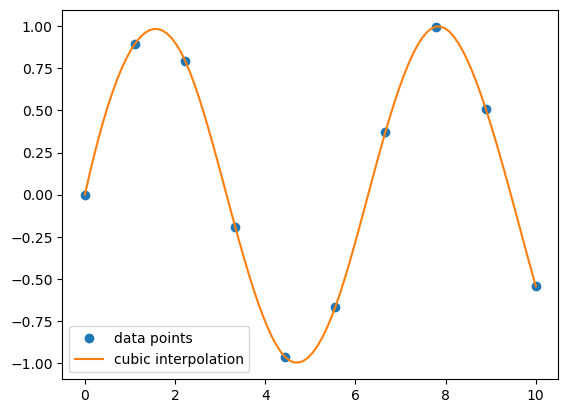

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sample data points
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Create the interpolating function
f = interp1d(x, y, kind='cubic')

# Interpolated values
x_new = np.linspace(0, 10, 100)
y_new = f(x_new)

# Plot the results
plt.plot(x, y, 'o', label='data points')
plt.plot(x_new, y_new, '-', label='cubic interpolation')
plt.legend()
plt.show()



These examples should give you a good starting point for using `scipy` in various scientific and technical computing tasks.

# Optimization